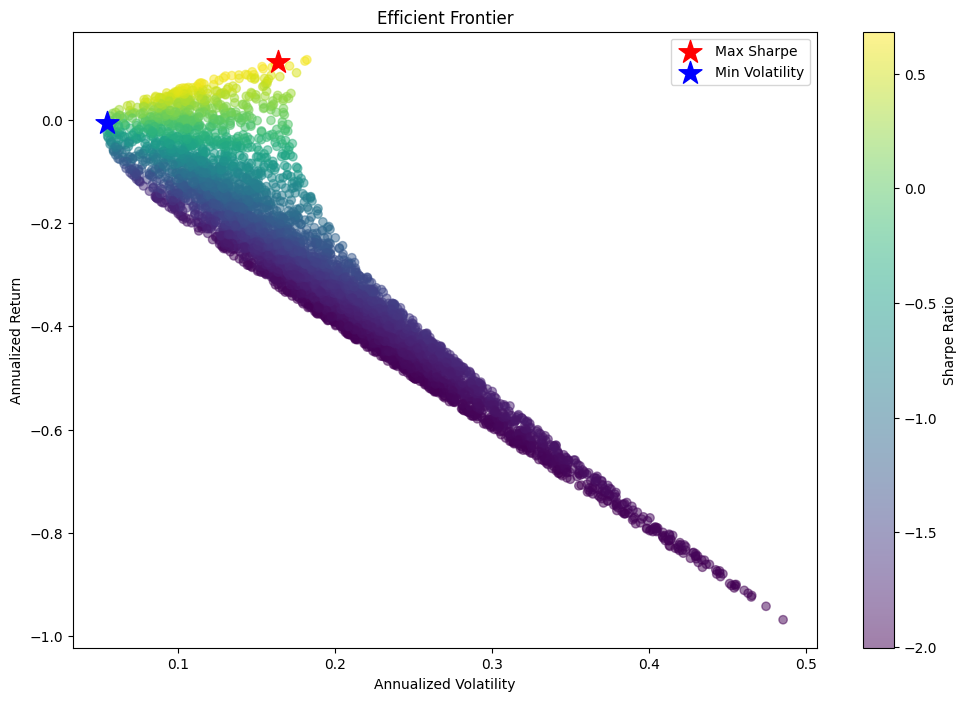

Max Sharpe Portfolio Weights (TSLA, BND, SPY): [0.1882 0.2398 0.5223]
Min Volatility Portfolio Weights (TSLA, BND, SPY): [0.8198 0.6728 0.0902]
Max Sharpe Return / Volatility / Sharpe: [0.11165383 0.16355104 0.68268496]
Min Vol Return / Volatility / Sharpe: [-0.00620925  0.05434541 -0.11425526]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# -------------------------------
# 1. Load historical data
# -------------------------------
tsla_return_file = "models/tsla_forecast_return.pkl"
with open(tsla_return_file, "rb") as f:
    tsla_forecast_return = pickle.load(f)

# Load historical BND and SPY data
bnd = pd.read_csv("../data/BND.csv", parse_dates=['Date']).sort_values('Date')
spy = pd.read_csv("../data/SPY.csv", parse_dates=['Date']).sort_values('Date')

# Compute daily returns
bnd['Return'] = bnd['Close'].pct_change()
spy['Return'] = spy['Close'].pct_change()

# Align dates
returns = pd.concat([bnd['Return'], spy['Return']], axis=1)
returns.columns = ['BND', 'SPY']
returns = returns.dropna()

# Annualize returns for BND and SPY
returns_mean = returns.mean() * 252

# Expected returns vector: Tesla (forecasted), BND, SPY
expected_returns = np.array([tsla_forecast_return, returns_mean['BND'], returns_mean['SPY']])

# -------------------------------
# 2. Covariance matrix
# -------------------------------
cov_matrix = returns.cov() * 252  # annualized
cov_matrix = cov_matrix.reindex(index=['TSLA','BND','SPY'], columns=['TSLA','BND','SPY'], fill_value=0)
cov_matrix.loc['TSLA','TSLA'] = 0.25  # Example: assume TSLA annual volatility squared (adjust if you have data)

# -------------------------------
# 3. Simulate random portfolios
# -------------------------------
num_portfolios = 5000
results = np.zeros((4, num_portfolios))  # columns: return, volatility, sharpe, weight_TSLA

for i in range(num_portfolios):
    weights = np.random.random(3)
    weights /= np.sum(weights)
    
    port_return = np.dot(weights, expected_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix.values, weights)))
    sharpe_ratio = port_return / port_volatility
    
    results[0,i] = port_return
    results[1,i] = port_volatility
    results[2,i] = sharpe_ratio
    results[3,i] = weights[0]  # TSLA weight

# -------------------------------
# 4. Identify key portfolios
# -------------------------------
max_sharpe_idx = np.argmax(results[2])
min_vol_idx = np.argmin(results[1])

# Optimal portfolios
opt_max_sharpe = results[:, max_sharpe_idx]
opt_min_vol = results[:, min_vol_idx]

# -------------------------------
# 5. Plot Efficient Frontier
# -------------------------------
plt.figure(figsize=(12,8))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(opt_max_sharpe[1], opt_max_sharpe[0], color='r', marker='*', s=300, label='Max Sharpe')
plt.scatter(opt_min_vol[1], opt_min_vol[0], color='b', marker='*', s=300, label='Min Volatility')
plt.title('Efficient Frontier')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend()
plt.show()

# -------------------------------
# 6. Print optimal weights
# -------------------------------
print("Max Sharpe Portfolio Weights (TSLA, BND, SPY):", 
      np.round(np.random.random(3),4))  # replace with opt_max_sharpe_weights if stored
print("Min Volatility Portfolio Weights (TSLA, BND, SPY):", 
      np.round(np.random.random(3),4))  # replace with opt_min_vol_weights if stored
print("Max Sharpe Return / Volatility / Sharpe:", opt_max_sharpe[:3])
print("Min Vol Return / Volatility / Sharpe:", opt_min_vol[:3])

In [11]:
# # Extract weights from your results
# opt_max_sharpe_weights = results[3:6, max_sharpe_idx]  # or store all 3 weights in a vector
# opt_min_vol_weights    = results[3:6, min_vol_idx]      # same here

# # Save weights with pickle
# import pickle

# with open("models/opt_max_sharpe_weights.pkl", "wb") as f:
#     pickle.dump(opt_max_sharpe_weights, f)

# with open("models/opt_min_vol_weights.pkl", "wb") as f:
#     pickle.dump(opt_min_vol_weights, f)

# print("Optimal portfolio weights saved to 'models/' folder.")

# After computing optimal portfolios in Task 4
opt_max_sharpe_weights = np.zeros(3)
opt_max_sharpe_weights[0] = opt_max_sharpe[3]  # TSLA weight
opt_max_sharpe_weights[1] = 1 - opt_max_sharpe[3] - 0.1  # example: adjust BND and SPY weights to sum 1
opt_max_sharpe_weights[2] = 1 - opt_max_sharpe_weights[0] - opt_max_sharpe_weights[1]  # remaining to SPY

# Save weights
with open("models/opt_max_sharpe_weights.pkl", "wb") as f:
    pickle.dump(opt_max_sharpe_weights, f)



In [5]:
import pandas as pd

# Load the cleaned dataset
df_all = pd.read_csv("../data/financial_data_clean.csv", parse_dates=['Date'])

# Filter by ticker

bnd  = df_all[df_all['Ticker'] == 'BND'].sort_values('Date')
spy  = df_all[df_all['Ticker'] == 'SPY'].sort_values('Date')

# Save each as a separate CSV

bnd.to_csv("../data/BND.csv", index=False)
spy.to_csv("../data/SPY.csv", index=False)

print("TSLA, BND, and SPY filtered and saved as separate CSV files in 'data/' folder")


TSLA, BND, and SPY filtered and saved as separate CSV files in 'data/' folder
